In [8]:
import data as data_import
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))


In [9]:

def exec(method = "Verlet", dt=1, dt2=50, tf=5):
    
    command = f"java -cp target/SimulacionTemporal-1.0-SNAPSHOT.jar -Dmethod={method} -Ddt={dt} -Ddt2={dt2} -Dtf={tf} OscilatorSystem"
    proc = os.popen(command)
    proc.readlines()
    proc.close()
    data = data_import.Data("oscilator.txt")
    return data



In [10]:
gamma = 100
m = 70
k= 10**4
A = 1


def solution(t):
    k1 = -gamma/(2*m)
    k2 = np.sqrt(k/m - gamma**2/(4*m**2))
    return A*np.exp(k1 * t) * np.cos(k2 * t)

## 1.2

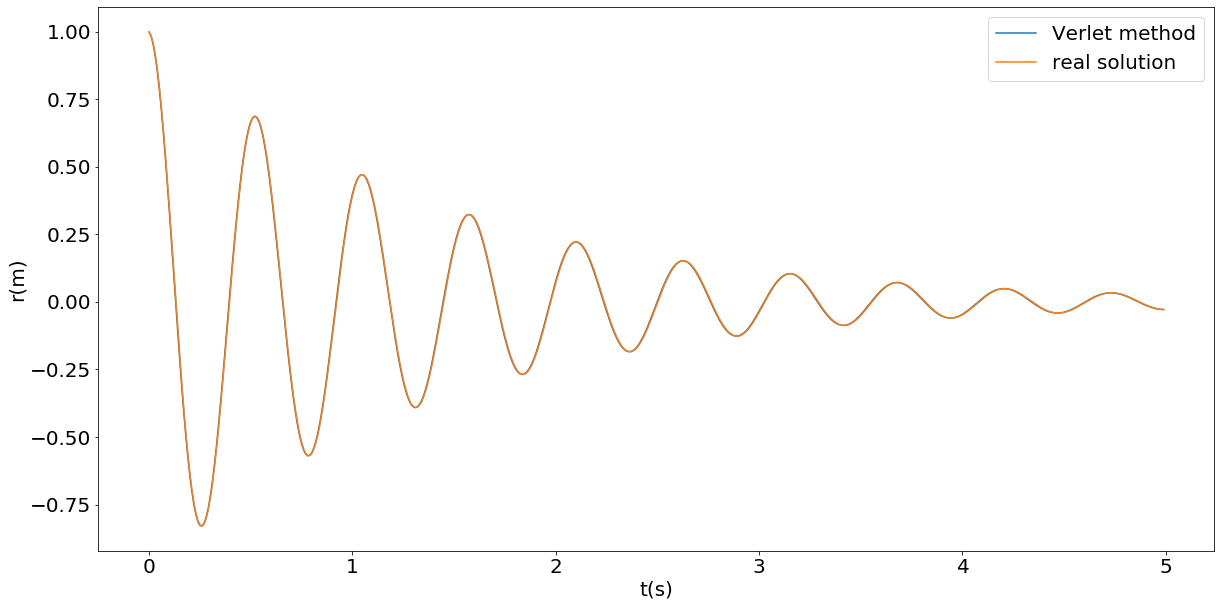

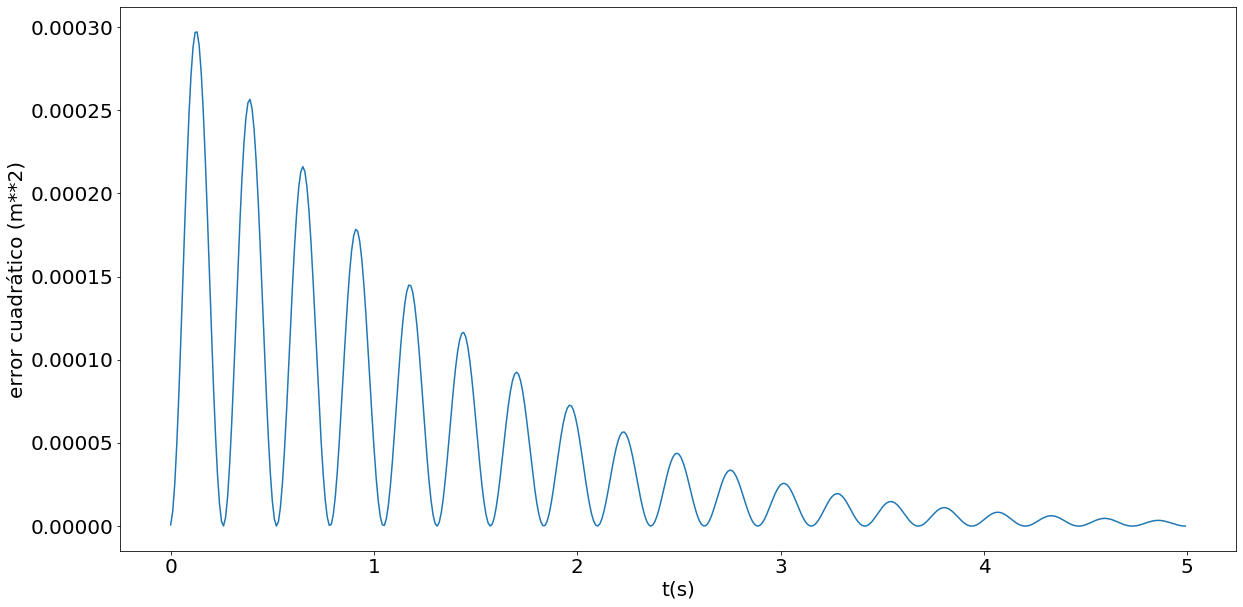

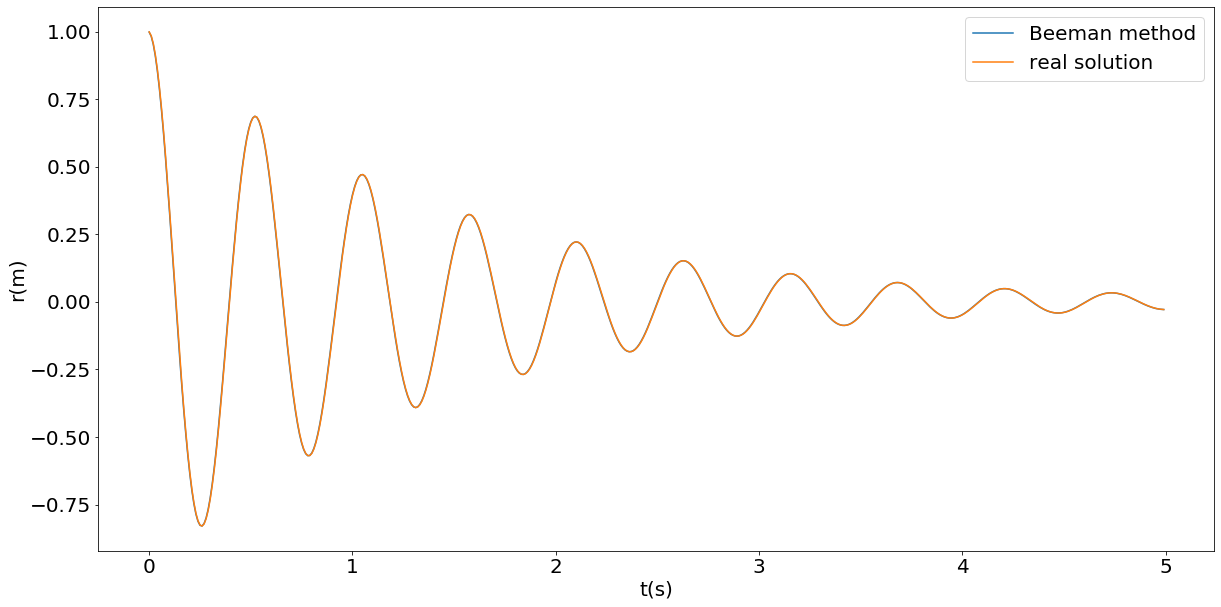

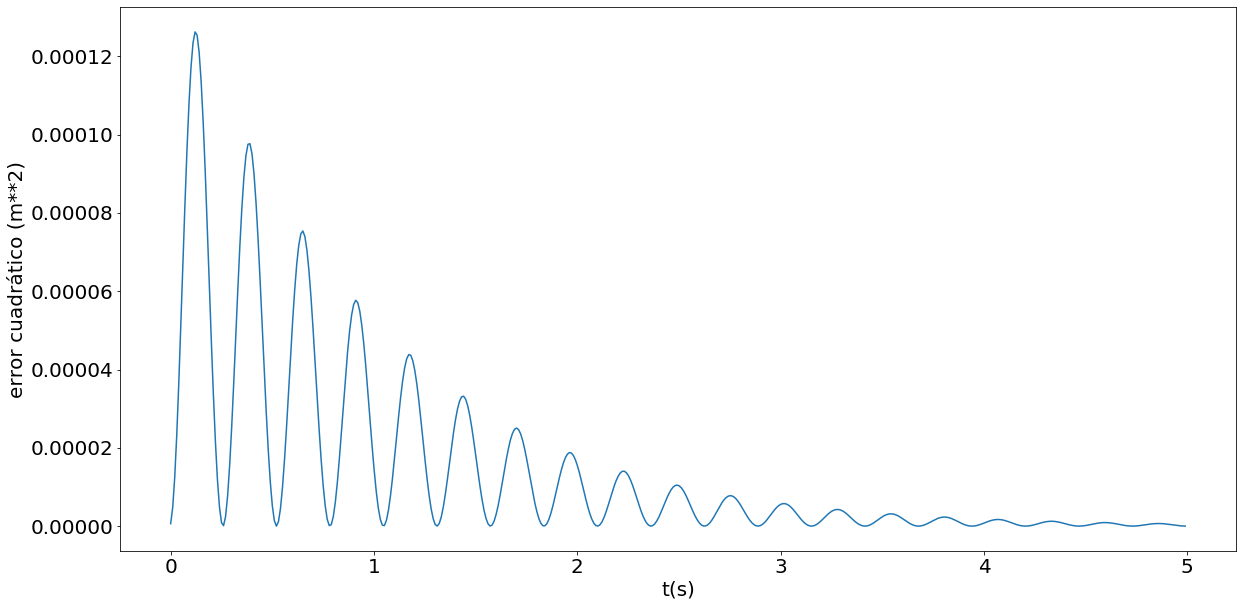

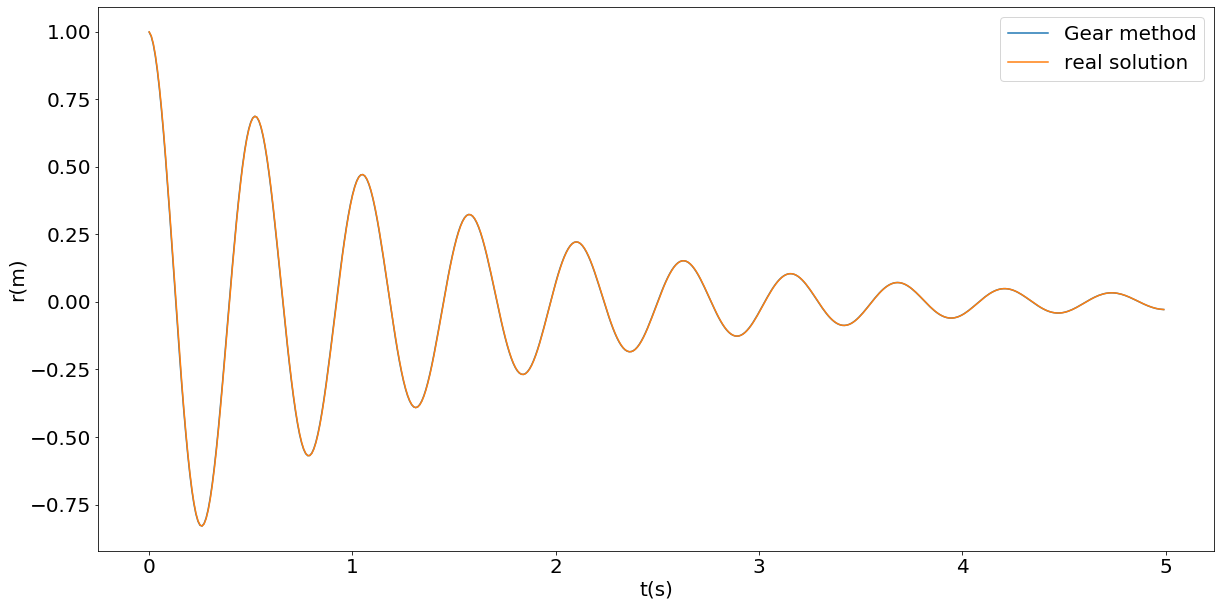

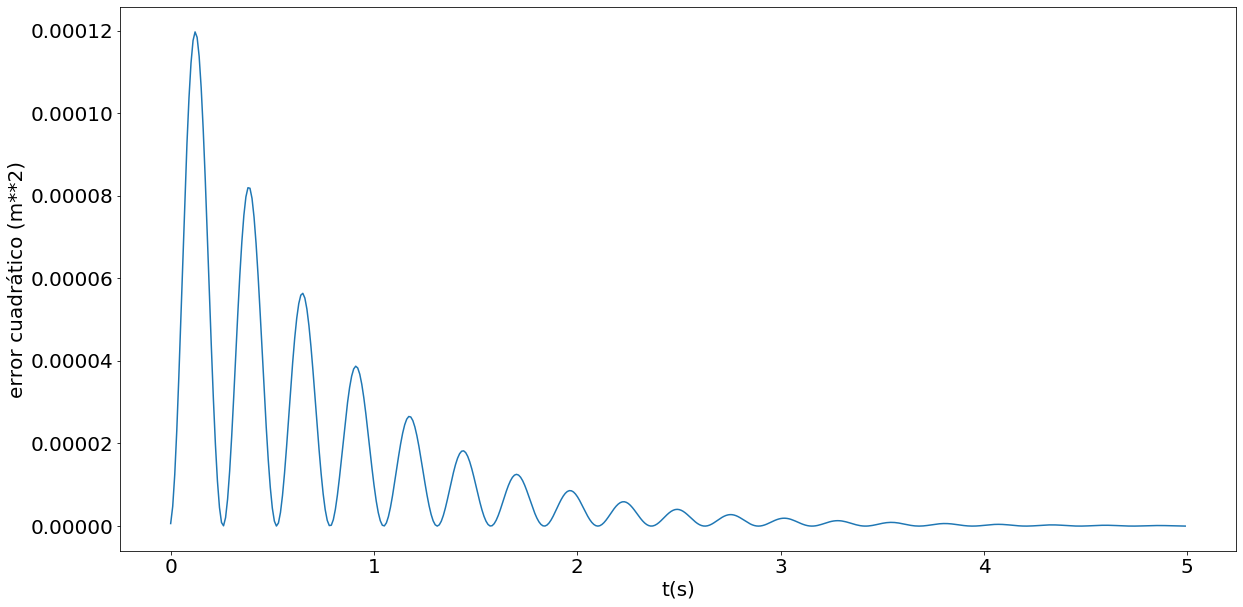

In [11]:
methods = ["Verlet", "Beeman", "Gear"]

for method in methods:
    plt.figure("position vs time - {}".format(method))
    data = exec(dt=1, dt2=10, method=method)

    positions = []
    times =[]

    for t, r, v, a in data:
        positions.append(r)
        times.append(t)
    
    positions = np.array(positions)
    times = np.array(times)
    real_positions = solution(times)       

    
    plt.plot(times, positions)
    plt.plot(times, real_positions)
    plt.xlabel("t(s)")
    plt.ylabel("r(m)")
    plt.legend(["{} method".format(method), "real solution"])

    errors = (positions - real_positions)**2
    plt.figure("error vs time - {}".format(method))
    plt.plot(times, errors)
    plt.xlabel("t(s)")
    plt.ylabel("error cuadrático (m**2)")
    plt.show()

## 1.3

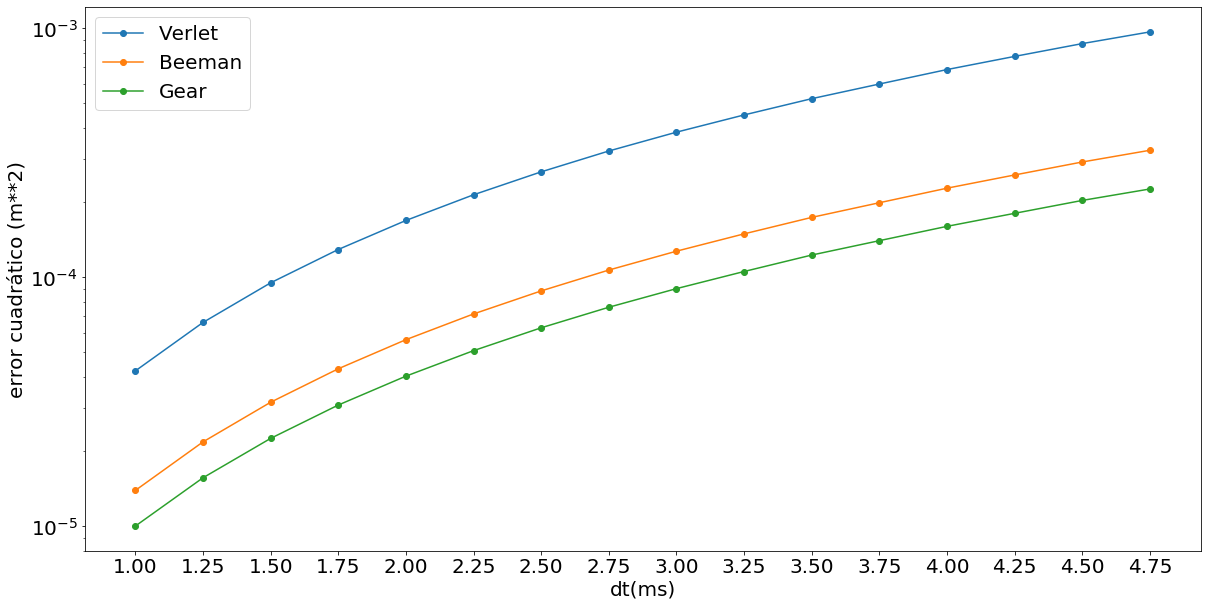

In [12]:
dts =np.arange(1, 5, 0.25)
dt2 = 10

plt.figure("error vs dt")

for method in methods:
    
    errors = []
    for dt in dts:
        data = exec(dt=dt, dt2=dt2, method=method)

        positions = []
        times =[]

        for t, r, v, a in data:
            positions.append(r)
            times.append(t)
        
        positions = np.array(positions)
        times = np.array(times)
        real_positions = solution(times)       
        
        error = np.mean((positions - real_positions)**2)

        errors.append(error)

    plt.plot(dts, errors,"o-", label=method)

plt.yscale("log")
plt.legend()
plt.ylabel("error cuadrático (m**2)")
plt.xlabel("dt(ms)")
plt.xticks(dts)
plt.show()
    
       
